<a href="https://colab.research.google.com/github/Rerzd/Training/blob/main/SQL_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SQL

The programming lenguajes for databases. Althought SQL can be used with speacializaed software like MySQL, DB.2, SQLite, etc. It can be used with python by using an API. In this case, we will use the DB-API.

Contents from this notebook were extracted from the coursera's Databases and SQL for data science

##Part 1

In [2]:
#Let's vcreate the database using SQLite

import sqlite3

In [3]:
#Connecting to sqlite

conn = sqlite3.connect('INSTRUCTOR.db')

In [4]:
#Cursor object

cursor_obj  = conn.cursor()

In [5]:
#Now we have to create a table in the DB. To create it, we have to check first if it doesn't exists. So we use DROP

cursor_obj.execute("DROP TABLE IF EXISTS INSTRUCTOR")

In [6]:
#Create the table
table = """CREATE TABLE IF NOT EXISTS INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2));"""

cursor_obj.execute(table)

print("Table is ready")

Table is ready


In [7]:
#Insert data into the table

cursor_obj.execute('''Insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')''')

In [8]:
cursor_obj.execute('''insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')''')

In [9]:
#Query data

statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in  output_all:
  print(row_all)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')
(3, 'Hima', 'Vasudevan', 'Chicago', 'US')


In [10]:
# Now let's fetch a few rows from the table

statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
#If you want to fetch few rows you use fetchmany(rows #) and mention how many rows you want to fetch
output_many = cursor_obj.fetchmany(2)
for row_many in  output_many:
  print(row_many)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')


In [11]:
#Fetch only Fname

statement = '''SELECT FNAME FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output_column = cursor_obj.fetchall()
for fetch in  output_column:
  print(fetch)

All the data
('Rav',)
('Raul',)
('Hima',)


In [12]:
#Let's make an update and run the query
query_update = '''update INSTRUCTOR set CITY='MOOSETOWN' where FNAME = "Rav"'''
cursor_obj.execute(query_update)

statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output1 = cursor_obj.fetchall()
for row in output1:
  print(row)

All the data
(1, 'Rav', 'Ahuja', 'MOOSETOWN', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')
(3, 'Hima', 'Vasudevan', 'Chicago', 'US')


In [13]:
import pandas as pd


In [14]:
# Let's retieve the data into pandas

df = pd.read_sql_query("SELECT * FROM INSTRUCTOR", conn)
df

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [15]:
df.LNAME[0]

'Ahuja'

In [16]:
df.shape

(3, 5)

In [17]:
conn.close() #Important to close ALWAYS

## Part 2

In [45]:
!pip install ipython-sql
%load_ext sql
#We use this to communicate with the SQL databases

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [46]:
#Here we create and connect a new SQLite database SQLiteMagic
import csv, sqlite3
con = sqlite3.connect("SQLiteMagic.db")
cur = con.cursor()

In [47]:
%sql sqlite:///SQLiteMagic.db

In [48]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country , first_name , last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)

 * sqlite:///SQLiteMagic.db
   sqlite:///socieconomic.db
Done.
99 rows affected.


[]

In [49]:
# We now install 'ipython-sql' and 'prettytable' libraries using !pip

!pip install ipython-sql prettytable

#Import prettytable library , used to display data in a formatted table

import prettytable

#Set the default display for prettytable to 'Default'

prettytable.DEFAULT = 'DEFAULT'

In [50]:
#We can use python varibales in the SQL statements by adding ":" prefix to python variable names. lest's make an example

country = "Canada" #I have a variable with the value Canada I can use the variable in a SQL query to find all rows of students from Canada
%sql SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES WHERE country = :country


 * sqlite:///SQLiteMagic.db
   sqlite:///socieconomic.db
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [51]:
# You can use the normal syntax of python to assign results of queries to python varaibles

#For example, I have the SQL query that retrieves distribution of test scores and I save the query in  test_score_distribution

test_score_distributions = %sql SELECT test_score AS " Test_score ", COUNT (*) AS " Frecuency" FROM INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distributions

 * sqlite:///SQLiteMagic.db
   sqlite:///socieconomic.db
Done.


Test_score,Frecuency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


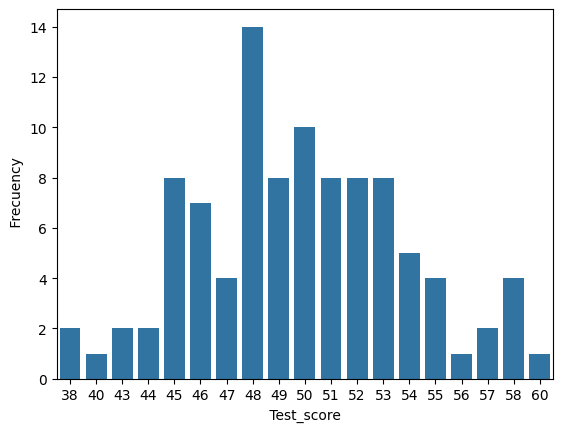

In [54]:
!pip install seaborn
!pip install matplotlib
dataframe= test_score_distributions.DataFrame()

%matplotlib inline
import seaborn

plot = seaborn.barplot(x=' Test_score ', y=' Frecuency', data=dataframe)

In [55]:
%%sql

SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;

 * sqlite:///SQLiteMagic.db
   sqlite:///socieconomic.db
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


In [56]:
%%sql

SELECT last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES WHERE test_score >=50;

 * sqlite:///SQLiteMagic.db
   sqlite:///socieconomic.db
Done.


last_name,test_score
Bernadot,54
Malkin,51
Furze,53
Erricker,55
Ingerson,57
Papaccio,55
Youens,51
Cosely,58
Huet,52
Privost,50


## Part 3: Exploratory Analisys

We have a dataset of the sociecomnomic dat aof the city of Chicago for the years 2008-2012 and contains a selection of six socieconomic indicators of public health significance and a "Hardship index", for each Chicago community area.

Scores on the hardship index range from 1 to 100, the higher the number, the greater the hardship


In [19]:
#First connect to the database

!pip install ipython-sql
import seaborn as sns
%load_ext sql

In [21]:
con = sqlite3.connect("socieconomic.db")
cur = con.cursor()
import pandas as pd

In [22]:
%sql sqlite:///socieconomic.db

In [23]:
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data",  con, if_exists = 'replace', index = False, method = "multi")

78

In [24]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [25]:
%sql SELECT* FROM chicago_socioeconomic_data LIMIT 5;

 * sqlite:///socieconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [26]:
#How many rows are in the dataset?
%%sql

SELECT * FROM chicago_socioeconomic_data;

 * sqlite:///socieconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [27]:
#How many community areas in Chicago have a hardship greater than 50.0?
%%sql

SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * sqlite:///socieconomic.db
Done.


COUNT(*)
38


In [30]:
#WHat is the maximum value of hardship index in the dataset?
df.describe()

,ca,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
count,77.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,77.000000
mean,39.000000,4.920513,21.739744,15.341026,20.330769,35.717949,25597.000000,49.506494
std,22.371857,3.658981,11.457231,7.499497,11.746514,7.284421,15196.405541,28.690556
min,1.000000,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,20.000000,2.325000,13.350000,9.200000,12.075000,32.150000,15804.750000,25.000000
50%,39.000000,3.850000,19.050000,13.850000,18.650000,38.050000,21668.500000,50.000000
75%,58.000000,6.800000,29.150000,20.000000,26.600000,40.500000,28715.750000,74.000000
max,77.000000,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [35]:

%%sql

SELECT MAX(hardship_index) AS Max_Hardship FROM chicago_socioeconomic_data;

 * sqlite:///socieconomic.db
Done.


Max_Hardship
98.0


In [37]:
#Which community area has the highest hardship index?
%%sql

SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT(MAX(hardship_Index)) from chicago_socioeconomic_data);

 * sqlite:///socieconomic.db
Done.


community_area_name
Riverdale


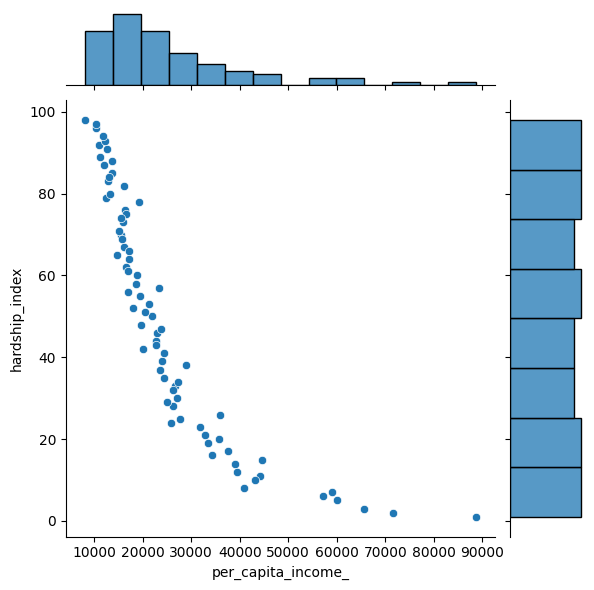

In [42]:
#Create a scatter plot with per_capita_income and harship_index and explain the correlation

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plot = sns.jointplot(x ='per_capita_income_', y ='hardship_index', data = df)
plt.show()

#As we can see in the results, there is an inversely proportional relationship betwwen the per capita income (x) and
#The hardship_index (y), since the higher the per capita income is, the lower the level of hardhsip